## Test Michael's Assertion that e1t and e2t are flipped

In [20]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
from salishsea_tools import geo_tools, viz_tools

%matplotlib inline

In [11]:
mesh_grid = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc') 
mesh_bathy = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')

In [12]:
mesh_lat = mesh_grid.variables['nav_lat'][:]
mesh_lon = mesh_grid.variables['nav_lon'][:]
e1t = mesh_grid.variables['e1t'][:]
e2t = mesh_grid.variables['e2t'][:]

In [14]:
bathy_lat = mesh_bathy.variables['nav_lat'][:]
bathy_lon = mesh_bathy.variables['nav_lon'][:]
depth = mesh_bathy.variables['Bathymetry'][:]

In [15]:
mesh_grid.close()
mesh_bathy.close()

In [6]:
ii = 345; jj=231  # a random point
print ('From mesh', mesh_lat[ii, jj], ' N ', -mesh_lon[ii, jj], 'W')
print ('From bathy', bathy_lat[ii, jj], 'N', -bathy_lon[ii, jj], 'W')

From mesh 48.6629  N  123.346 W
From bathy 48.6628608704 N 123.346435547 W


In [7]:
print ('Grid Size e1t', e1t[0, ii,jj])
print ('Grid Size from long/lat', geo_tools.haversine(mesh_lon[ii, jj], mesh_lat[ii, jj],
                                                     mesh_lon[ii, jj+1], mesh_lat[ii, jj+1])*1000.)

Grid Size e1t 503.18632932
Grid Size from long/lat 437.825221915


In [8]:
print ('Grid Size e2t', e2t[0, ii,jj])
print ('Grid Size from long/lat', geo_tools.haversine(mesh_lon[ii, jj], mesh_lat[ii, jj],
                                                     mesh_lon[ii+1, jj], mesh_lat[ii+1, jj])*1000.)

Grid Size e2t 437.266355617
Grid Size from long/lat 502.633189601


## Conclusion:
Indeed e1t and e2t are flipped.  Also our haversine or NEMO's calculation is only good to 3 sig figs

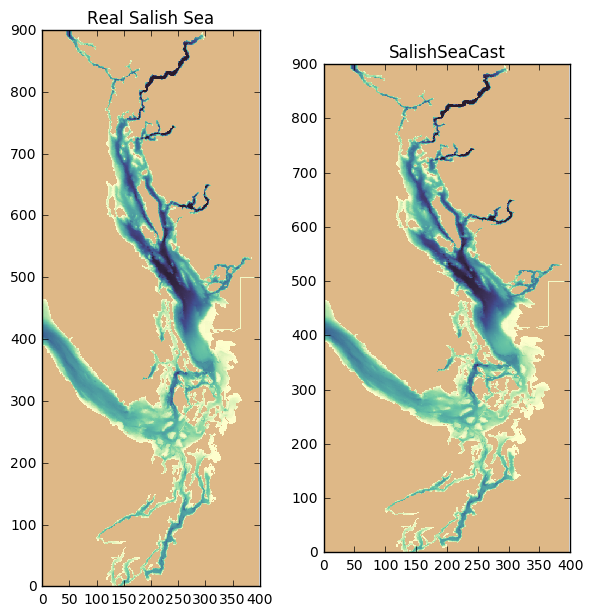

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(7, 7.18))
cmap = cm.deep
cmap.set_bad('burlywood')
ax[0].pcolormesh(depth, cmap=cm.deep)
viz_tools.set_aspect(ax[0])
ax[1].pcolormesh(depth, cmap=cm.deep)
viz_tools.set_aspect(ax[1], aspect=4.4/5)
ax[0].set_title('Real Salish Sea')
ax[1].set_title('SalishSeaCast')